# Homework 2
In this homework assignment, you will explore Auto-MPG Dataset. 

Dataset contains following attributes:
1. mpg (miles per gallon)
2. cylinders (number of cylinders, power unit of an engine)
3. displacement (total volume of all the cylinders in an engine, measured in cubic centimeters [cc])
4. horsepower: (the amount of power an engine develops)
5. weight: (weight of the car)
6. acceleration: (accelaration of the car)
7. year: (model year of the car, two digits representing the year from 19**)
8. origin: (shows the origin of the car, 1 for American, 2 for European and 3 for Asian)
9. car name: (unique name for each car)

You will explore the data types and scales, cardinalities, number of missing values, detect outliers, handle missing values and outliers and create data quality report for original and cleaned dataset.

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### Read the dataset

In [0]:
adf = pd.read_csv('auto-mpg.csv')

### Q1 (10 points)
Identify the data types (numerical [int, float], categorical) and data scales for all the attributes.

In [7]:
# Answer to Q1
adf.dtypes
print(' ')
adf.info()

#Here origin is categorical because. Externally origin is referring to the place like , 
#1 for American, 2 for European and 3 for Asian etc. Hence it is included in Categorical data.   

 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       406 non-null int64
displacement    406 non-null float64
horsepower      400 non-null float64
weight          406 non-null int64
acceleration    406 non-null float64
year            406 non-null int64
origin          406 non-null int64
carname         406 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.7+ KB


| Attribute  | Data Type             | Data Scale  |
|------------|-----------------------|-------------|
|mpg         | Numerical   (Float64) |  Ratio      |
|displacement| Numerical   (Float64) |  Ratio      |
|horsepower  | Numerical   (Float64) |  Ratio      |
|weight      | Numerical   (int64)   |  Ratio      |
|year        | Numerical   (int64)   |  Interval   |
|origin      | Categorical (int64)   |  Nominal    |
|carname     | Categorical (object)  |  Nominal    |
|acceleration| Numerical   (Float64) |  Ratio      |





### Q2 (20 points)
Identify the cardinalities (number of unique values) and number of missing values for each attribute

In [9]:
# Your answer to Q2 goes here!

for (name,series) in adf.iteritems():
    print('We are finding the Cardinality and Missing vlaues for Attribute: ', name)
    print('Total size of item  ', name ,' is        ',series.size)
    print('Cardinality of item ',name  ,' is        ',series.unique().size)
    print('Missing values of the item ', name,' is ', series.isnull().sum())
    print(' ')

We are finding the Cardinality and Missing vlaues for Attribute:  mpg
Total size of item   mpg  is         406
Cardinality of item  mpg  is         130
Missing values of the item  mpg  is  8
 
We are finding the Cardinality and Missing vlaues for Attribute:  cylinders
Total size of item   cylinders  is         406
Cardinality of item  cylinders  is         6
Missing values of the item  cylinders  is  0
 
We are finding the Cardinality and Missing vlaues for Attribute:  displacement
Total size of item   displacement  is         406
Cardinality of item  displacement  is         83
Missing values of the item  displacement  is  0
 
We are finding the Cardinality and Missing vlaues for Attribute:  horsepower
Total size of item   horsepower  is         406
Cardinality of item  horsepower  is         94
Missing values of the item  horsepower  is  6
 
We are finding the Cardinality and Missing vlaues for Attribute:  weight
Total size of item   weight  is         406
Cardinality of item  weight

### Q3 (20 points)
Visualize the distribution of each attribute (other than carname, since it is unique). Note here that for nominal and ordinal scale attributes, use bar plots. For ratio and interval scale attributes, use histograms.

Hint: To get the counts of numerical (but also nominal) attributes, you can use `value_counts()` method.


Text(0.5, 1.0, 'Bar plot for Origin distribution')

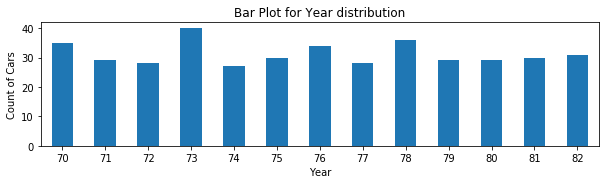

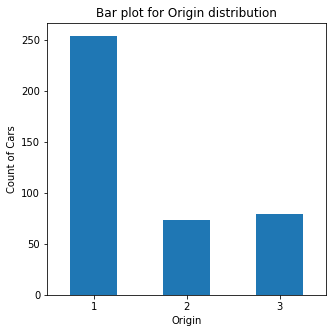

In [10]:
# For categorical attributes
plt.figure(figsize=(10,5)) 
plt.subplot(2,1,1)
adf['year'].value_counts()
adf['year'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Count of Cars')
plt.xticks(rotation=0)
plt.title('Bar Plot for Year distribution')
 
plt.figure(figsize=(5,5)) 
    
# plt.subplot(2,1,2)
adf['origin'].value_counts()
adf['origin'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Origin')
plt.xticks(rotation=0)
plt.ylabel('Count of Cars')
plt.title('Bar plot for Origin distribution')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe58ba02710>,
      dtype=object)

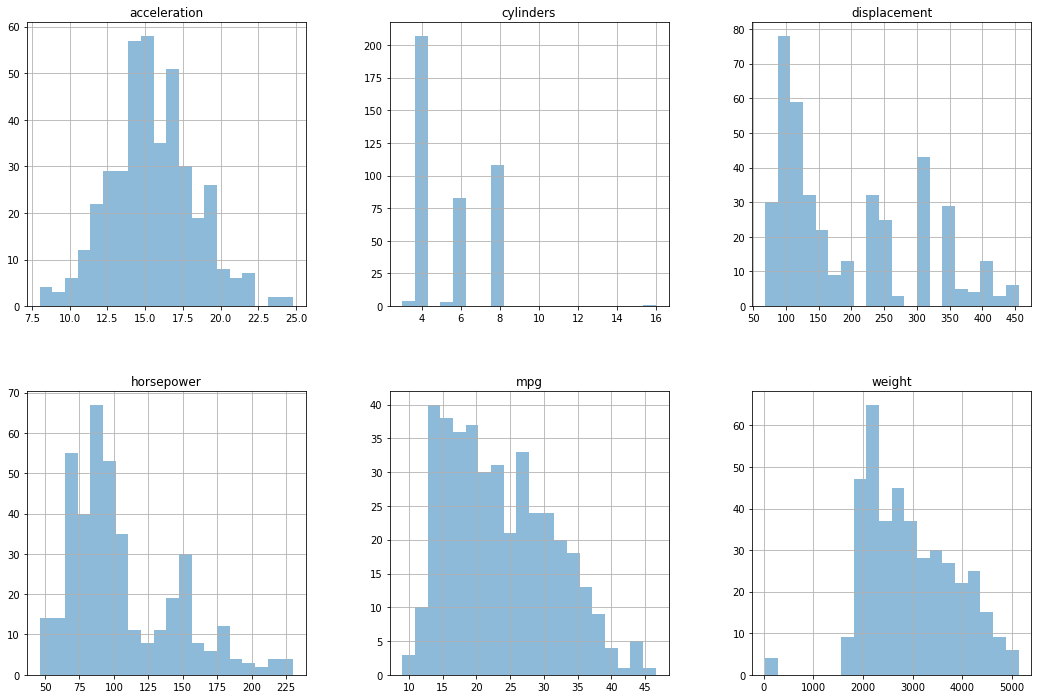

In [27]:
# For numerical attributes

col_list=['mpg','cylinders','displacement','horsepower','weight','acceleration']

fig, ax=plt.subplots(2,3,figsize=(18,12))
df_for_hist = adf[col_list]
df_for_hist.hist(bins=20,alpha=0.5,ax=ax)


### Q4 (20 points)
Using your favorite outlier detection method, identify the outliers for each attribute (other than year, origin, and carname). For each outlier, remove the outlier or replace with a default value.

Hint 1: For simplicity, you can use $\mu \pm 2\sigma$ (alternatively, $3\sigma$) or the interval between $Q1-1.5IQR$ and $Q3+1.5IQR$.

Hint 2: To replace, you can use the median/mean value or minimum/maximum value depending on the direction of the outlier.


Outlier's  before the Noramliation 


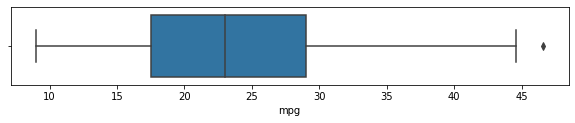

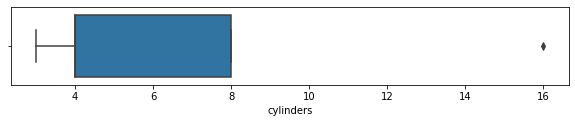

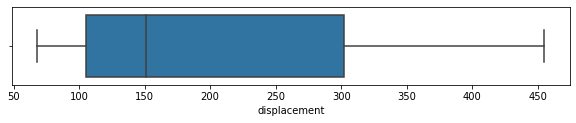

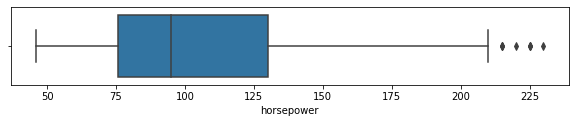

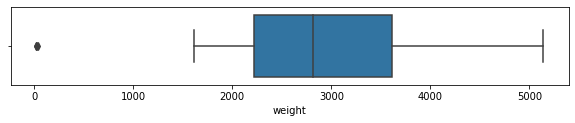

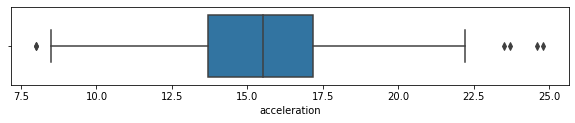


First Quantile
mpg               17.50
cylinders          4.00
displacement     105.00
horsepower        75.75
weight          2220.00
acceleration      13.70
year              73.00
origin             1.00
Name: 0.25, dtype: float64


Third Quantile
mpg               29.000
cylinders          8.000
displacement     302.000
horsepower       130.000
weight          3612.000
acceleration      17.175
year              79.000
origin             2.000
Name: 0.75, dtype: float64


IQR Values
mpg               11.500
cylinders          4.000
displacement     197.000
horsepower        54.250
weight          1392.000
acceleration       3.475
year               6.000
origin             1.000
dtype: float64


Observations in interval between  𝑄1−1.5𝐼𝑄𝑅  and  𝑄3+1.5𝐼𝑄𝑅

      mpg  cylinders  ...  origin                            carname
6    14.0          8  ...       1                   chevrolet impala
7    14.0          8  ...       1                  plymouth fury iii
8    14.0          8  .

In [26]:
# Answer to Q4 goes here
col_list=['mpg','cylinders','displacement','horsepower','weight','acceleration']
df_for_boxplot = adf[col_list]
import seaborn as sns
adf_copy=adf.copy()

print('Outlier\'s  before the Noramliation ' )
plt.figure(figsize=(10,10)) 
plt.title('Boxplot for MPG ')
plt.subplot(6,1,1)
sns.boxplot(adf['mpg'])

plt.figure(figsize=(10,10)) 
plt.subplot(6,1,2)
sns.boxplot(adf['cylinders'])

plt.figure(figsize=(10,10)) 
plt.subplot(6,1,3)
sns.boxplot(adf['displacement'])

plt.figure(figsize=(10,10)) 
plt.subplot(6,1,4)
sns.boxplot(adf['horsepower'])


plt.figure(figsize=(10,10)) 
plt.subplot(6,1,5)
sns.boxplot(adf['weight'])

plt.figure(figsize=(10,10)) 
plt.subplot(6,1,6)
sns.boxplot(adf['acceleration'])
plt.show()


print('')
Q1=adf_copy.quantile(0.25)
print('First Quantile')
print(Q1)
print('')
print('')
Q3=adf_copy.quantile(0.75)
print('Third Quantile')
print(Q3)
IQR = Q3-Q1
print('')
print('')
print('IQR Values')
print(IQR)
print('')
print('')

print('Observations in interval between  𝑄1−1.5𝐼𝑄𝑅  and  𝑄3+1.5𝐼𝑄𝑅')
print('')

adf1=adf[((adf < (Q1 - 1.5 * IQR)) |(adf > (Q3 + 1.5 * IQR))).any(axis=1)]


for (name,series) in adf_copy.iteritems():
    Q1=series.quantile(0.25)
    Q3=series.quantile(0.75)
    IQR=Q3-Q1
    print(IQR)




### Q5 (10 points)
Handle the missing values you found in Q2 using kNN imputation. Use `KNNImputer` from `sklearn.imputer` for this task. Set the number of neighbors to 3 and use the column subset of `['cylinders', 'displacement', 'weight']` for imputation.

In [16]:
# Answer to Q5 goes here
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)
impute_copy = adf[['mpg', 'horsepower', 'cylinders', 'displacement', 'weight']].copy()

# your code ....
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)
impute_copy = adf[['mpg', 'horsepower', 'cylinders', 'displacement', 'weight']].copy()

# your code ....
impute_copy['mpg'] = knn_imputer.fit_transform(adf[['mpg']])
impute_copy['horsepower'] = knn_imputer.fit_transform(adf[['horsepower']])

print('Total missing values in the original data set is ', adf.isnull().sum())
print('')
print('Total missing values after knn imputation is ',impute_copy.isnull().sum())
print(' ')
print(' ')
print(impute_copy)


Total missing values in the original data set is  mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
year            0
origin          0
carname         0
dtype: int64

Total missing values after knn imputation is  mpg             0
horsepower      0
cylinders       0
displacement    0
weight          0
dtype: int64
 
 
      mpg  horsepower  cylinders  displacement  weight
0    18.0       130.0          8         307.0    3504
1    15.0       165.0          8         350.0    3693
2    18.0       150.0          8         318.0    3436
3    16.0       150.0          8         304.0    3433
4    17.0       140.0          8         302.0    3449
..    ...         ...        ...           ...     ...
401  27.0        86.0          4         140.0    2790
402  44.0        52.0          4          97.0    2130
403  32.0        84.0          4         135.0    2295
404  28.0        79.0          4         120.0    2625
405  31.0       

### Q6 (20 points)
Create a Scatter Plot Matrix (a pair plot) of attributes. Use `origin` map plot aspects to different colors. Based on the SPLOM, answer the following questions.

#### Q6.a -  What can you say about the relationship between cylinders and mpg values?
#### Q6.b -  What can you say about the cylinders of Asian cars (origin = 3)?
#### Q6.c -  Is there a correlation between weight and displacement?

Hint: Use keyword argument `hue='origin'` and `markers` to see the differences of cars with different origins.



scatter plot for Cylinder on X axis and mpg on Y axis


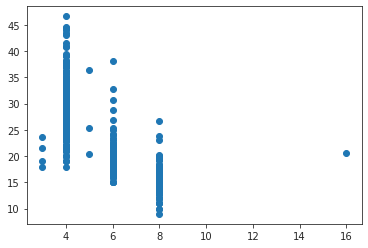

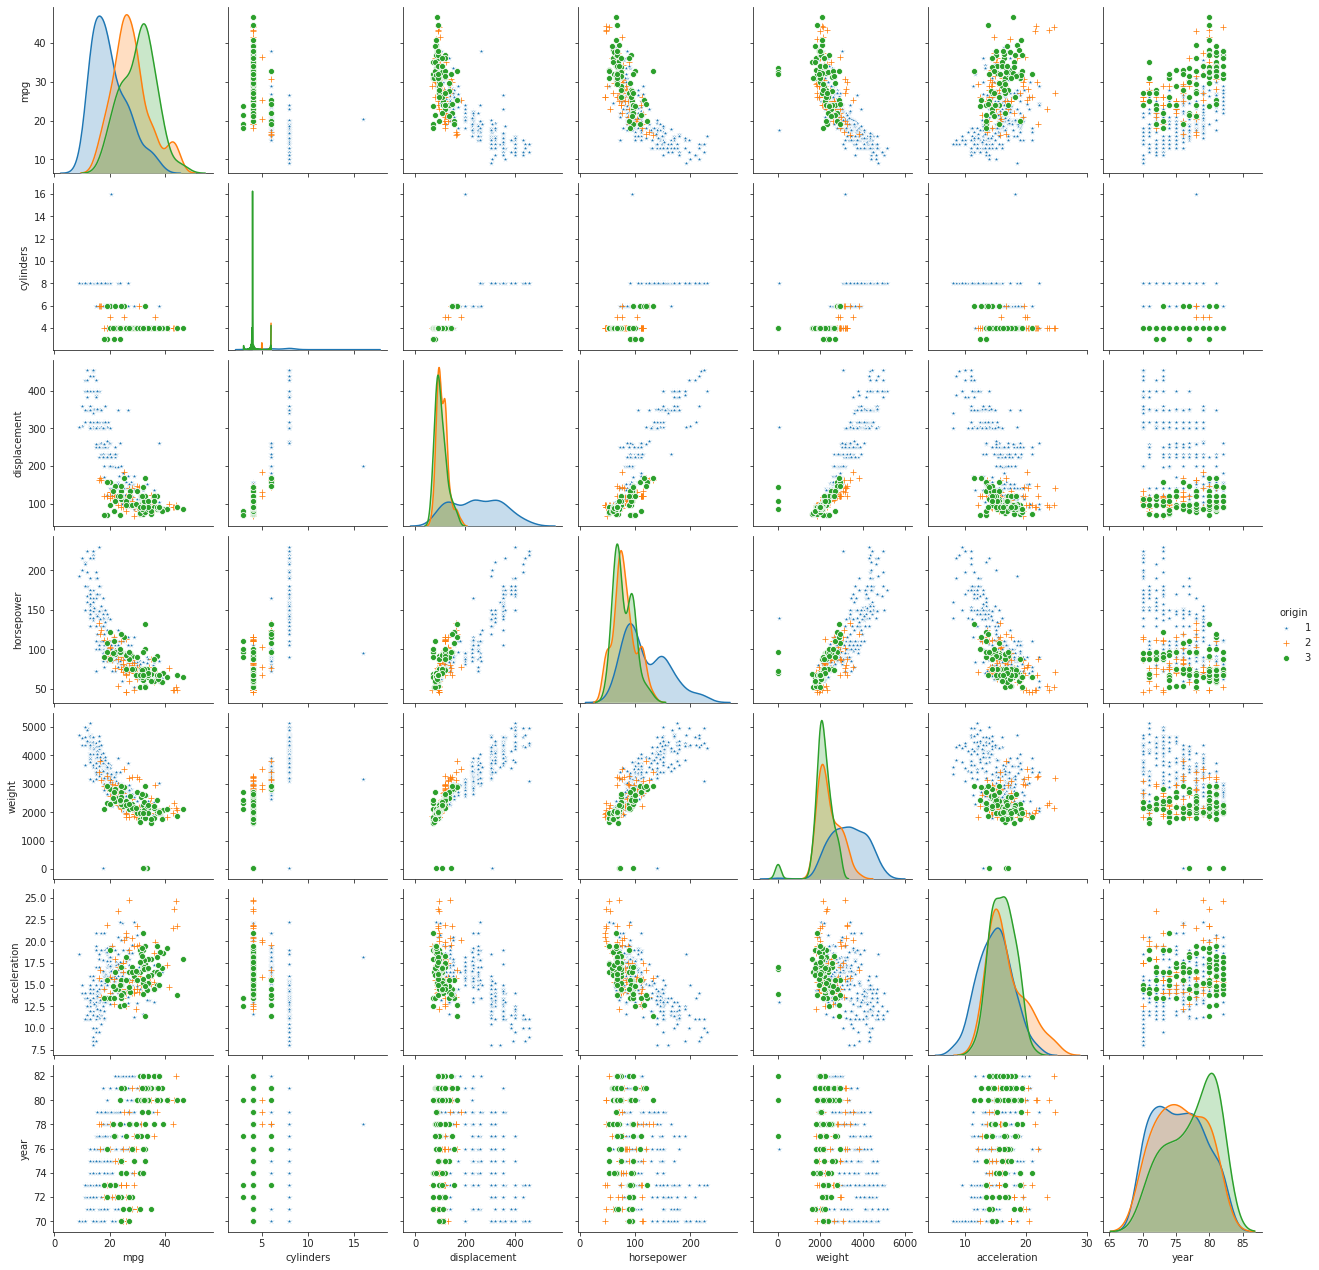

In [51]:
import seaborn as sns

# you answer to Q6 goes here...
df_scatter=adf._get_numeric_data()
ax=plt.scatter(adf['cylinders'], adf['mpg'])

print('')
print('scatter plot for Cylinder on X axis and mpg on Y axis')
ax.xlabel = 'Cylinders'
ax.ylabel = 'mpg'



df_concise = df_scatter[['mpg','cylinders','displacement','horsepower','weight','acceleration','origin','year']]
mark=['*','+','o']
sns.set_style("ticks")
sns.pairplot(df_concise,hue='origin', markers=mark)

# Qestion 1:
#     For the first origin i.e. 1 shows a little variation in the distribution of cylinder's. But most of 
#     the cylinder distributions are constant. But there is a distinct variation in its mpg for almost unique cylinder 
#     value. A few distributions of mpg fell apart. With the sam cylinder values the mpg is increasing. This means 

# Question 2:
#     The Cylinder for origin=3 (i.e. Asian Cars show a constant distribution). Show a little deviation with respect to the
#     change in other parameters. But it shows a constant behaviour for majority of it's distribution.
#     mpg shows a constant increase in its value with respect to the asian cylinders. All most all other 
#     attributes shows similar change in the trends when compared with origin 3 cylinders.

# Question 3:
#      Yes, there is correlation between weight and displacement if we observe the graph a change in one attribute reflects 
#      its change in the other attribute.
#      Even if we observe the co- relation matrix we can say that 
#      both of the attributes are closely related to each other.
#      Even the correlation values between them show a strong relation between them.

### Bonus Question (20 points)

Create a data quality report for the Auto-MPG dataset. 

Provide the data quality tables, distributions of categorical and nominal variables.

Also provide your solutions for handling outliers and missing values. 

Create the data quality tables after handling outliers and missing values.

Provide this as a separate PDF file. You can use the cells below to find statistics and create visualizations.


In [35]:
#Number of zero's in the Attributes in the Dataset
cont_list=adf[['mpg','cylinders','displacement','horsepower','weight','acceleration']]
cat_list = adf[['carname','origin']]

print('')
print(cont_list)
print('')
print(cat_list)

print('Lets see the description of the Continous data')
print(cont_list.describe().T)

print('Lets look at the description of Categorical data')
print(cat_list.describe().T)




      mpg  cylinders  displacement  horsepower  weight  acceleration
0    18.0          8         307.0       130.0    3504          12.0
1    15.0          8         350.0       165.0    3693          11.5
2    18.0          8         318.0       150.0    3436          11.0
3    16.0          8         304.0       150.0    3433          12.0
4    17.0          8         302.0       140.0    3449          10.5
..    ...        ...           ...         ...     ...           ...
401  27.0          4         140.0        86.0    2790          15.6
402  44.0          4          97.0        52.0    2130          24.6
403  32.0          4         135.0        84.0    2295          11.6
404  28.0          4         120.0        79.0    2625          18.6
405  31.0          4         119.0        82.0    2720          19.4

[406 rows x 6 columns]

                       carname  origin
0    chevrolet chevelle malibu       1
1            buick skylark 320       1
2           plymouth satellit